# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
file_path = "/Users/juhyunlee/Documents/umich/untitled folder/MDST-Onboarding-main/data/states_edu.csv"
states_edu_df = pd.read_csv(file_path)

states_edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [4]:
unique_years = states_edu_df['YEAR'].nunique()
unique_years


33

The dataset contains data logged for 33 unique years.

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
michigan_data = states_edu_df[states_edu_df['STATE'] == 'MICHIGAN']
ohio_data = states_edu_df[states_edu_df['STATE'] == 'OHIO']

michigan_avg_math_4 = michigan_data['AVG_MATH_4_SCORE'].mean()
ohio_avg_math_4 = ohio_data['AVG_MATH_4_SCORE'].mean()

michigan_avg_math_4, ohio_avg_math_4



(234.36363636363637, 239.45454545454547)


Ohio has a higher average score (239.45) in the 4th-grade math test compared to Michigan's average score (234.36) across all years

Find the average for your chosen test across all states in 2019

In [7]:
data_2019 = states_edu_df[states_edu_df['YEAR'] == 2019]

avg_math_4_2019 = data_2019['AVG_MATH_4_SCORE'].mean()

avg_math_4_2019


239.9433962264151

The average 4th-grade math score across all states in 2019 is approximately 239.94.

For each state, find a maximum value for your chosen test score

In [9]:
max_math_4_scores_by_state = states_edu_df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

max_math_4_scores_by_state


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

Massachusetts, Minnesota, and New Hampshire have the highest scores, each reaching 253.
Other states like Indiana, Kansas, and Vermont have scores close to that, reaching 249-250.

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:

# Expenditure per student
states_edu_df['expenditure_per_student'] = states_edu_df['TOTAL_EXPENDITURE'] / states_edu_df['ENROLL']

# Revenue per student
states_edu_df['revenue_per_student'] = states_edu_df['TOTAL_REVENUE'] / states_edu_df['ENROLL']

# Federal, state, and local revenue ratios
states_edu_df['federal_revenue_ratio'] = states_edu_df['FEDERAL_REVENUE'] / states_edu_df['TOTAL_REVENUE']
states_edu_df['state_revenue_ratio'] = states_edu_df['STATE_REVENUE'] / states_edu_df['TOTAL_REVENUE']
states_edu_df['local_revenue_ratio'] = states_edu_df['LOCAL_REVENUE'] / states_edu_df['TOTAL_REVENUE']

# Instruction expenditure ratio
states_edu_df['instruction_expenditure_ratio'] = states_edu_df['INSTRUCTION_EXPENDITURE'] / states_edu_df['TOTAL_EXPENDITURE']

# Display the first few rows with the new features
states_edu_df[['STATE', 'expenditure_per_student', 'revenue_per_student', 'federal_revenue_ratio', 'state_revenue_ratio', 'local_revenue_ratio', 'instruction_expenditure_ratio']].head()


,STATE,expenditure_per_student,revenue_per_student,federal_revenue_ratio,state_revenue_ratio,local_revenue_ratio,instruction_expenditure_ratio
0,ALABAMA,NaN,NaN,0.113546,0.619298,0.267156,0.558333
1,ALASKA,NaN,NaN,0.101735,0.686659,0.211606,0.512461
2,ARIZONA,NaN,NaN,0.091431,0.420436,0.488133,0.422130
3,ARKANSAS,NaN,NaN,0.104308,0.560051,0.335641,0.553248
4,CALIFORNIA,NaN,NaN,0.078921,0.630103,0.290976,0.529091


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

1. Expenditure per Student:

I created this feature because the total expenditure divided by the number of students enrolled can give insight into how much each state spends per student. This could directly impact student performance, as states that invest more in each student's education might yield better academic outcomes.

2. Revenue per Student:

Similarly, I created revenue per student because states with higher revenue may have more resources to allocate towards education, potentially affecting test scores.

3. Federal, State, and Local Revenue Ratios:

These features were created to understand how dependent each state is on different types of funding. A higher reliance on federal or local funding could correlate with different performance outcomes compared to state-funded education systems.

4. Instruction Expenditure Ratio:

This feature shows the proportion of total expenditure that goes directly to instruction. A higher instruction expenditure might indicate a greater focus on teaching quality and materials, which could affect student performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

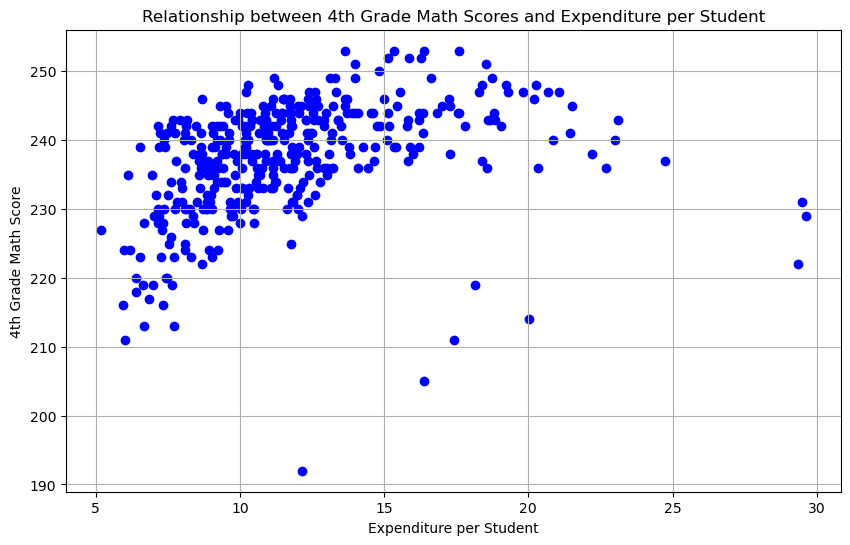

In [11]:

# Visualization 1: Relationship between AVG_MATH_4_SCORE and expenditure_per_student
plt.figure(figsize=(10, 6))
plt.scatter(states_edu_df['expenditure_per_student'], states_edu_df['AVG_MATH_4_SCORE'], color='b')
plt.title('Relationship between 4th Grade Math Scores and Expenditure per Student')
plt.xlabel('Expenditure per Student')
plt.ylabel('4th Grade Math Score')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 1>**
n the scatter plot, we see the relationship between the expenditure per student and the average 4th-grade math scores across various states. It appears there isn't a very clear linear relationship, suggesting that other factors may also heavily influence student performance beyond just expenditure per student.

**Visualization 2**

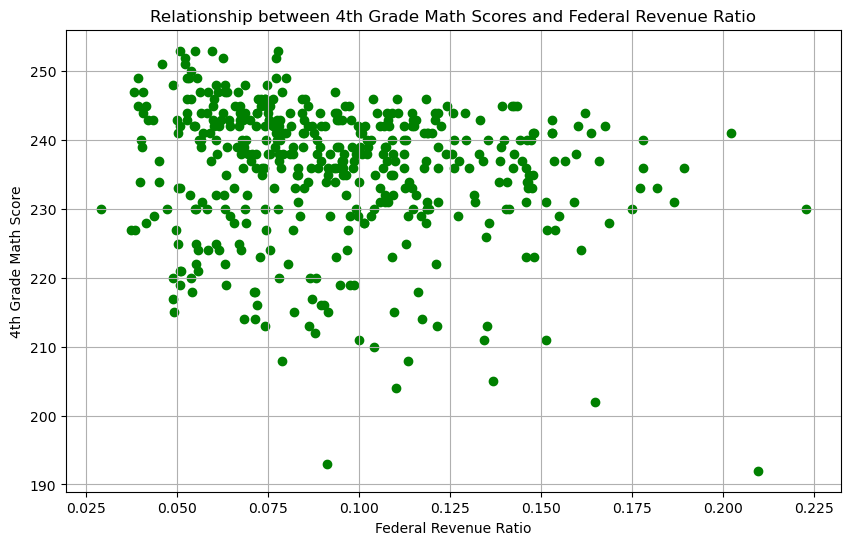

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(states_edu_df['federal_revenue_ratio'], states_edu_df['AVG_MATH_4_SCORE'], color='g')
plt.title('Relationship between 4th Grade Math Scores and Federal Revenue Ratio')
plt.xlabel('Federal Revenue Ratio')
plt.ylabel('4th Grade Math Score')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 2>**
In this scatter plot, the relationship between the federal revenue ratio and 4th-grade math scores is shown. There is no clear pattern or correlation, indicating that the proportion of federal revenue in a state's funding might not have a direct or strong influence on math scores.





<h2> Data Creation </h2>

_Use this space to create train/test data_

In [26]:

from sklearn.model_selection import train_test_split

In [27]:
features = states_edu_df[['expenditure_per_student', 'revenue_per_student', 'federal_revenue_ratio',
                          'state_revenue_ratio', 'local_revenue_ratio', 'instruction_expenditure_ratio']]
target = states_edu_df['AVG_MATH_4_SCORE']

features.fillna(features.mean(), inplace=True)
target.fillna(target.mean(), inplace=True)



/var/folders/fc/nt72rpzj6nn1m_6ltm7k5g200000gn/T/ipykernel_67118/2704445372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


In [28]:

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1372, 6), (343, 6), (1372,), (343,))

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [30]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [31]:
# create your model here
model = LinearRegression()


In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5028.070808198407
R^2 Score: -227.91669829422554


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

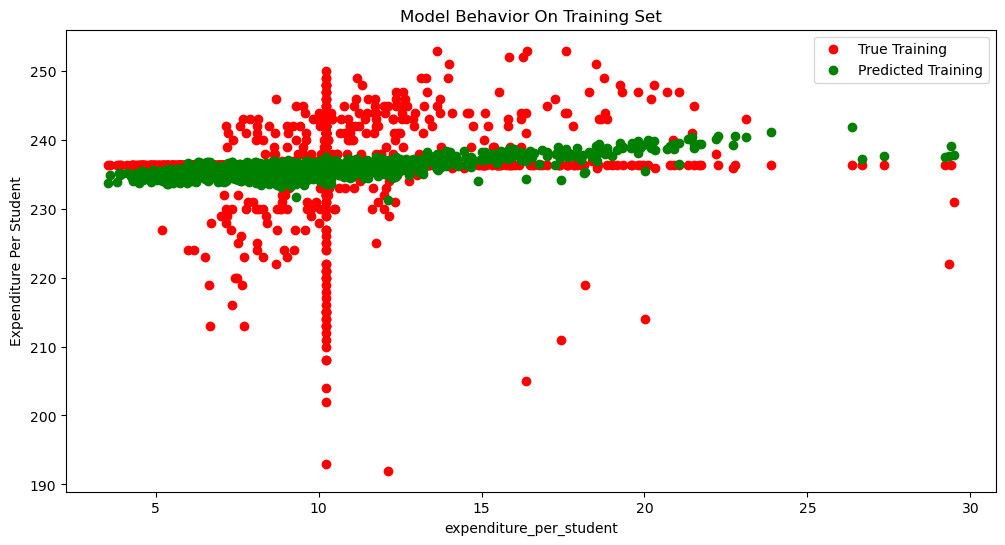

In [36]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Expenditure Per Student')  
plt.title("Model Behavior On Training Set")
plt.show()

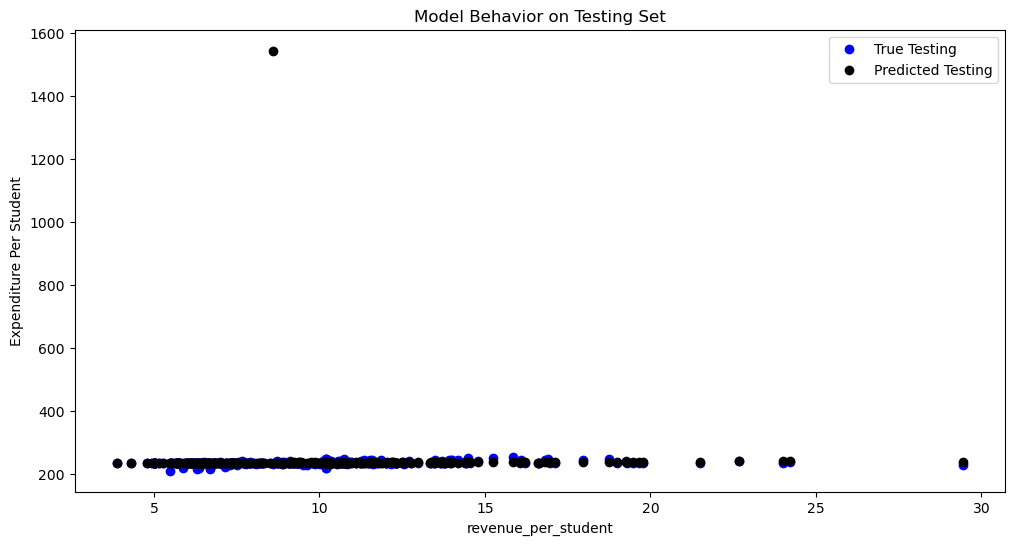

In [42]:
col_name = 'revenue_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True Testing','Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('Expenditure Per Student')
plt.title("Model Behavior on Testing Set")
plt.show()